In [1]:
#pip install yfinance

# yfinance is a popular open source library
  # to access the financial data available on Yahoo Finance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.arima.model import ARIMA


import yfinance as yf
import datetime
from datetime import date, timedelta

In [19]:
today = date.today()

stdate = today - timedelta(days=365)
start_date = stdate.strftime("%Y-%m-%d")
print("start_date:", start_date)

#end_date = (today - timedelta(days=1)).strftime("%Y-%m-%d")
end_date = today.strftime("%Y-%m-%d")
print("end_date:", end_date)

start_date: 2022-09-22
end_date: 2023-09-22


In [64]:
#timezone = 'America/New_York'
#yf.pdr_override()

df = yf.download('GOOG', start=start_date, end=end_date, group_by='ticker', progress=False)


In [38]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-22,99.449997,101.680000,99.410004,100.570000,100.570000,21272700
2022-09-23,100.059998,100.110001,98.010002,99.169998,99.169998,25657000
2022-09-26,98.610001,100.440002,98.379997,98.809998,98.809998,22437900
2022-09-27,99.910004,100.459999,97.339996,98.089996,98.089996,24225000
2022-09-28,98.019997,101.400002,97.800003,100.739998,100.739998,24617000


In [46]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-15,138.800003,139.360001,137.179993,138.300003,138.300003,48947600
2023-09-18,137.630005,139.929993,137.630005,138.960007,138.960007,16233600
2023-09-19,138.250000,139.175003,137.500000,138.830002,138.830002,15479100
2023-09-20,138.830002,138.839996,134.520004,134.589996,134.589996,21473500
2023-09-21,132.389999,133.190002,131.089996,131.360001,131.360001,22018681


In [34]:
df.to_csv('GoogleStock_22_23.csv')

In [28]:
df1 = yf.download('AAPL', start=start_date, end=end_date, progress=False)

In [30]:
df1.to_csv('Apple_Stock_22_23.csv')
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-22,152.380005,154.470001,150.910004,152.740005,151.839233,86652500
2022-09-23,151.190002,151.470001,148.559998,150.429993,149.542862,96029900
2022-09-26,149.660004,153.770004,149.639999,150.770004,149.880859,93339400
2022-09-27,152.740005,154.720001,149.949997,151.759995,150.865021,84442700
2022-09-28,147.639999,150.639999,144.839996,149.839996,148.956329,146691400


In [66]:
df["Date"] = df.index



In [67]:
df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-09-15,138.800003,139.360001,137.179993,138.300003,138.300003,48947600
247,2023-09-18,137.630005,139.929993,137.630005,138.960007,138.960007,16233600
248,2023-09-19,138.250000,139.175003,137.500000,138.830002,138.830002,15479100
249,2023-09-20,138.830002,138.839996,134.520004,134.589996,134.589996,21473500
250,2023-09-21,132.389999,133.190002,131.089996,131.360001,131.360001,22018681


In [68]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-22,99.449997,101.680000,99.410004,100.570000,100.570000,21272700
1,2022-09-23,100.059998,100.110001,98.010002,99.169998,99.169998,25657000
2,2022-09-26,98.610001,100.440002,98.379997,98.809998,98.809998,22437900
3,2022-09-27,99.910004,100.459999,97.339996,98.089996,98.089996,24225000
4,2022-09-28,98.019997,101.400002,97.800003,100.739998,100.739998,24617000


In [69]:
data = df[["Date","Close"]]
data.head()

,Date,Close
0,2022-09-22,100.570000
1,2022-09-23,99.169998
2,2022-09-26,98.809998
3,2022-09-27,98.089996
4,2022-09-28,100.739998


In [76]:
# visualization with Plotly.express
print("visualization with Plotly.express")
fig_close = px.line(data, x='Date', y='Close', title='Close Price of Google')
fig_close.show()

visualization with Plotly.express


visualization with Matplotlib


Text(0.5, 1.0, 'Close Price')

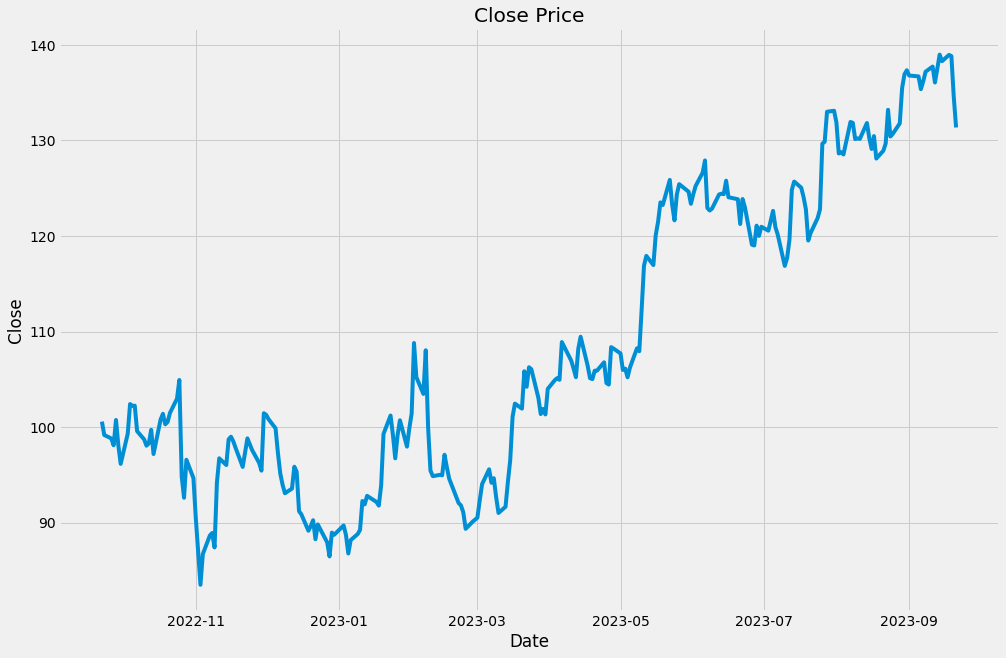

In [77]:
# visualization with Matplotlib

print("visualization with Matplotlib")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close Price')

<Figure size 432x288 with 0 Axes>

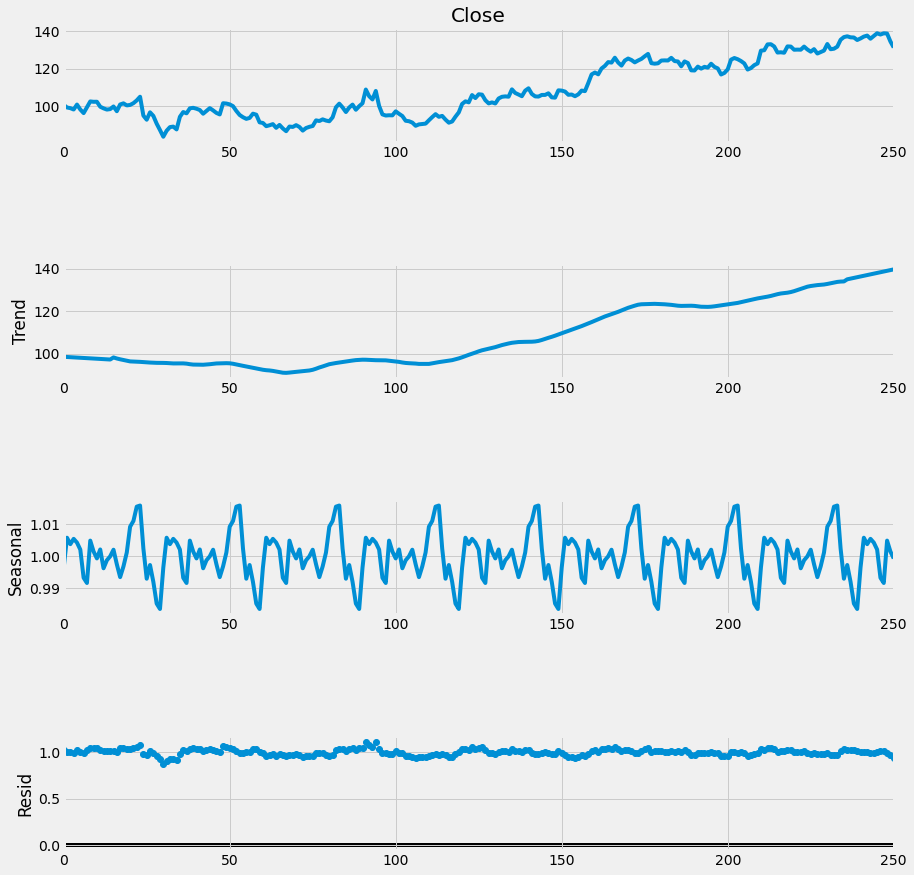

In [95]:
# from visulization, data is not stationary
# we can check whether the data is stationary or seasonal using seosnal decompose

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period=30 ,extrapolate_trend='freq')



fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 15)

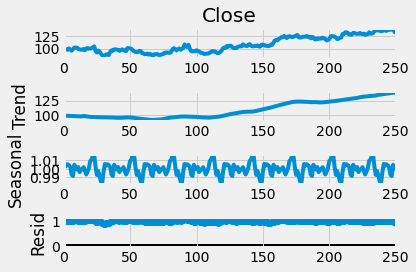

In [96]:
result.plot()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

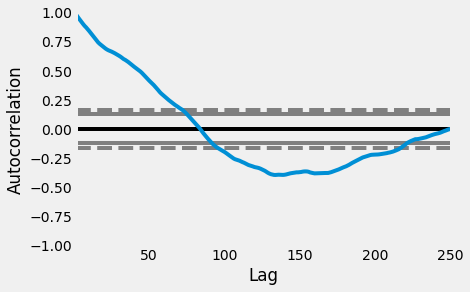

In [97]:
# so its a seadonal data but not stationary.
# hence, it need to use the seasonal ARIMA (SARIMA)
# first trying ARIMA

#### ARIMA ####

pd.plotting.autocorrelation_plot(data["Close"])

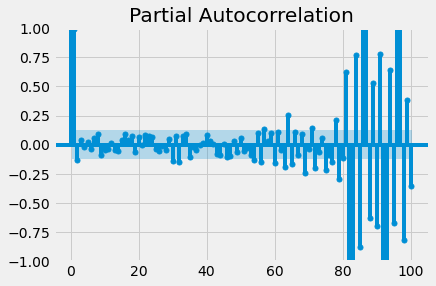

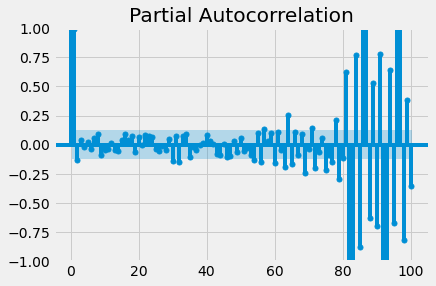

In [109]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags=100)

In [119]:
p, d, q = 6, 1, 7
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\abm_0\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(6, 1, 7)   Log Likelihood                -551.339
Date:                Fri, 22 Sep 2023   AIC                           1130.677
Time:                        01:38:35   BIC                           1179.978
Sample:                             0   HQIC                          1150.519
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3604      0.135      2.679      0.007       0.097       0.624
ar.L2          0.2236      0.125      1.784      0.074      -0.022       0.469
ar.L3          0.0018      0.102      0.018      0.9

C:\Users\abm_0\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [120]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      100.570027
2       99.094799
3       98.927968
4       98.092492
          ...    
246    139.258269
247    138.750934
248    139.226147
249    137.867636
250    135.003073
Name: predicted_mean, Length: 251, dtype: float64


In [132]:

import warnings
#p, d, q = 6, 1, 7

model= SARIMAX(data['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))


In [133]:
model1 = model.fit()


C:\Users\abm_0\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [134]:
print(model1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(6, 1, 7)x(6, 1, 7, 12)   Log Likelihood                -536.317
Date:                            Fri, 22 Sep 2023   AIC                           1126.635
Time:                                    01:58:16   BIC                           1220.386
Sample:                                         0   HQIC                          1164.418
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0968      0.114     -0.847      0.397      -0.321       0.127
ar.L2         -0.3621      0.116   

In [135]:
predictions = model1.predict(len(data), len(data)+10)
print(predictions)

251    131.005069
252    132.157169
253    131.869848
254    132.762122
255    133.476564
256    131.050934
257    131.864247
258    130.910491
259    132.166403
260    131.927288
261    130.286699
Name: predicted_mean, dtype: float64


In [136]:
predictions = model1.predict(len(data)-10, len(data)+10)
print(predictions)

241    136.351752
242    138.307097
243    139.442667
244    135.415047
245    138.290113
246    139.877996
247    138.464648
248    138.917563
249    137.290880
250    136.245471
251    131.005069
252    132.157169
253    131.869848
254    132.762122
255    133.476564
256    131.050934
257    131.864247
258    130.910491
259    132.166403
260    131.927288
261    130.286699
Name: predicted_mean, dtype: float64


In [138]:
data['Close'].tail(10)

241    137.199997
242    137.740005
243    136.070007
244    137.500000
245    138.990005
246    138.300003
247    138.960007
248    138.830002
249    134.589996
250    131.360001
Name: Close, dtype: float64